In [1]:
import pandas as pd
import xpressplot as xp
import numpy as np

<b><u>RNAseq</u></b>

In [43]:
#Import data
rna = pd.read_csv('rnaseq_data.txt',sep='\t', index_col=0)
meta_rna = pd.read_csv('metadata_rnaseq.txt',sep='\t',header=None)

gene_dict = pd.read_csv('gene_dictionary.txt',sep='\t',header=None)
gene_dict = pd.Series(gene_dict[1].values,index=gene_dict[0]).to_dict()

In [44]:
rna = rna[rna.min(axis=1) >= 10]

In [45]:
#Normalize data and rename genes
rna_n = xp.rpm(rna)

rna_n['new'] = rna_n.index.to_series().map(gene_dict).fillna(rna_n.index.to_series())
rna_n = rna_n.set_index('new')
rna_n.index.name = None

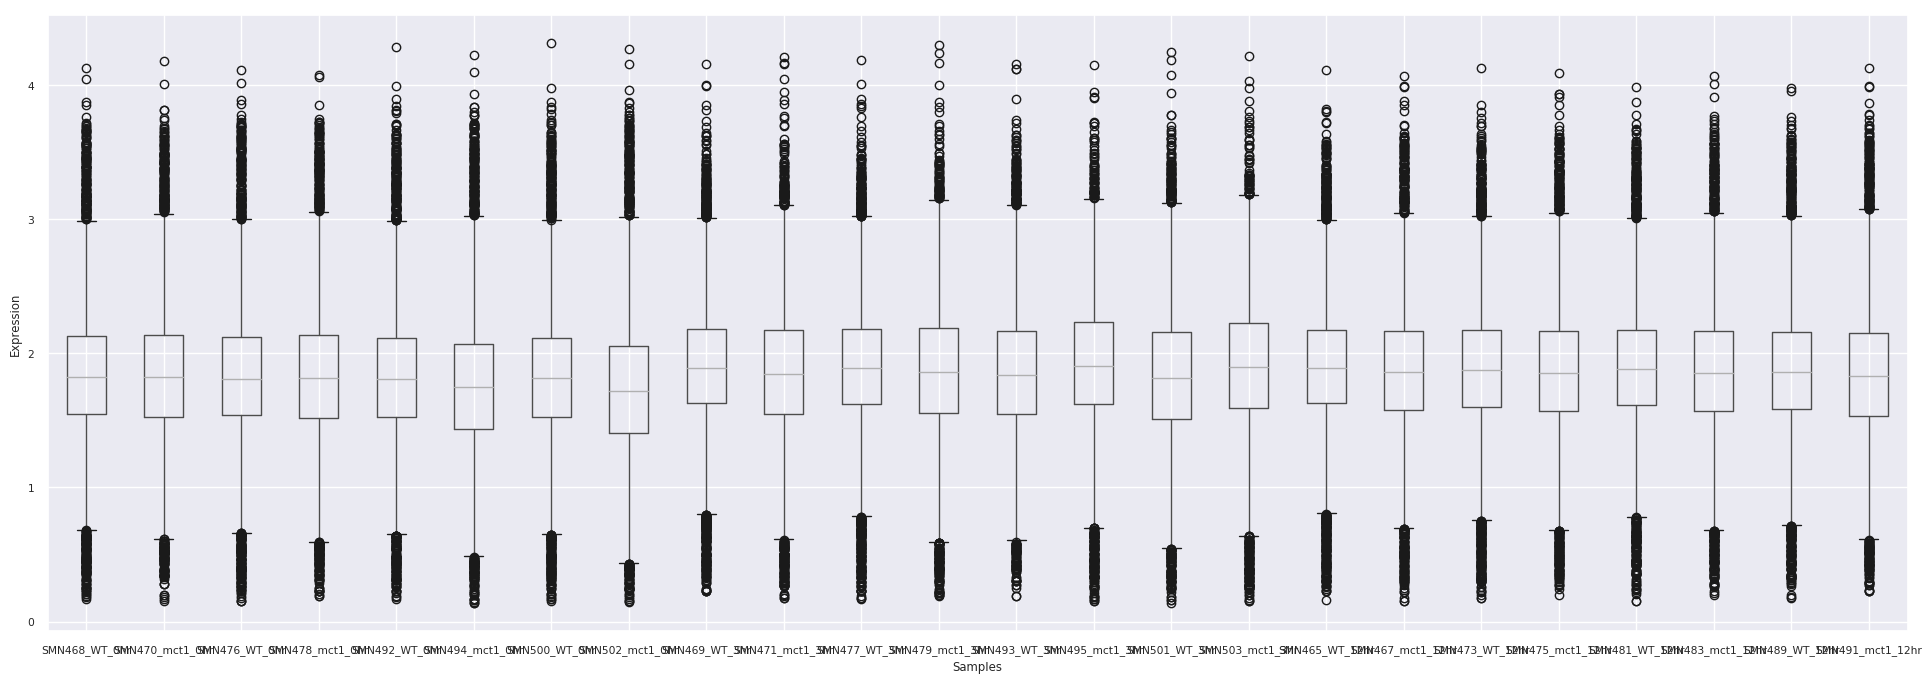

In [46]:
#Check normalized distributions
rna_l = np.log10(rna_n + 1)
xp.check_samples(rna_l)

In [47]:
#Heatmap prep
rna_scaled, rna_orig = xp.prep_data(rna_n, meta_rna)

In [48]:
colors = {
    'WT_0hr': '#01FFF0',
    'WT_3hr': '#07BCB1',
    'WT_12hr': '#027871',
    'mct1_0hr': '#F68F8F',
    'mct1_3hr': '#E43F3F',
    'mct1_12hr': '#A90D0D'
}

genes = pd.read_csv('heatmap_genes.txt',sep='\t',header=None)
genes = genes[0].tolist()
print(len(genes))

63


In [49]:
genes1 = genes[0:23]
genes2 = genes[23:]

In [50]:
#Create sample ordered dataframe
rna_ordered = rna_scaled.reindex(meta_rna[0].tolist(), axis=1)

<Figure size 640x480 with 0 Axes>

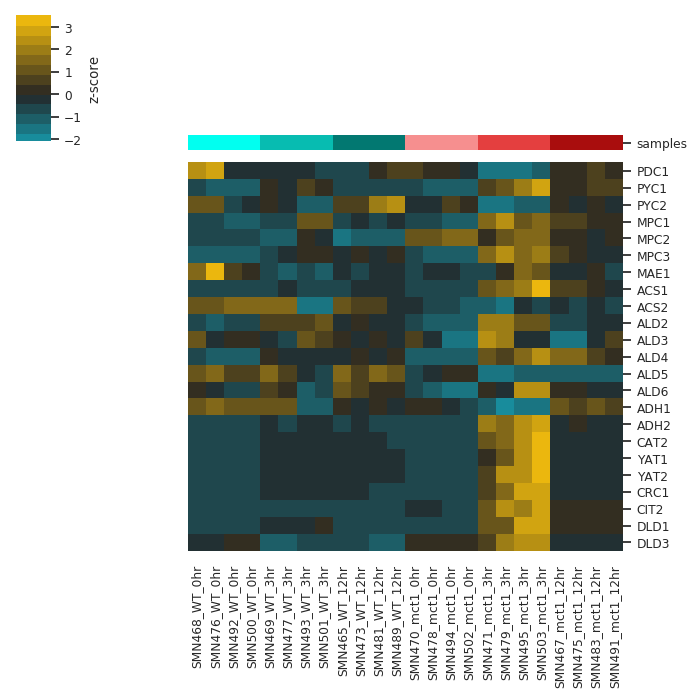

In [51]:
xp.heatmap(rna_ordered, meta_rna, sample_palette=colors, 
           gene_list=genes1, col_cluster=False, 
           figsize=(7,7), cbar_kws= {'label': 'z-score'},
          save_fig='./rnaseq_heatmap1.pdf', dpi=1200)

In [53]:
gene_group = pd.DataFrame()
gene_group[0] = genes2
gene_group[1] = [
    'Complex II',
    'Complex II',
    'Complex II',
    'Complex II',
    'Complex III',
    'Complex III',
    'Complex III',
    'Complex III',
    'Complex III',
    'Complex III',
    'Complex III',
    'Complex III',
    'CYC1',
    'Complex IV',
    'Complex IV',
    'Complex IV',
    'Complex IV',
    'Complex IV',
    'Complex IV',
    'Complex IV',
    'Complex IV',
    'Complex IV',
    'Complex IV',
    'Complex IV',
    'Complex IV',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',
    'Complex V',   
]

gene_colors = {
    'Complex II':'#1b9e77',
    'Complex III':'#d95f02',
    'CYC1':'#7570b3',
    'Complex IV':'#e7298a',
    'Complex V':'#66a61e',
}

<Figure size 640x480 with 0 Axes>

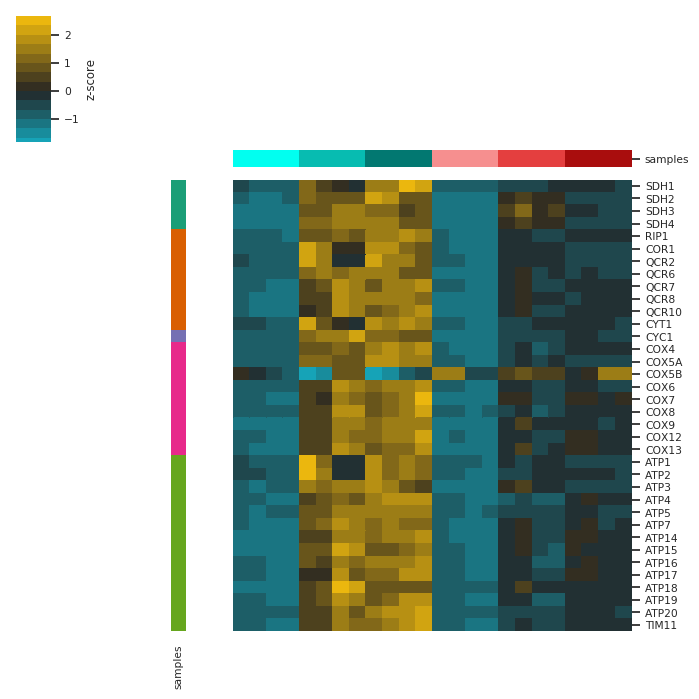

In [54]:
xp.heatmap(
    rna_ordered, 
    meta_rna, 
    gene_info = gene_group,
    gene_palette = gene_colors,
    sample_palette=colors, 
    gene_list=genes2, 
    col_cluster=False, 
    figsize=(7,7), 
    cbar_kws= {'label': 'z-score'},
    xticklabels = False,
    yticklabels = True,
    font_scale=0.7,
    save_fig='./rnaseq_heatmap3.pdf', dpi=1200)

<b><u>Proteomics</u></b>

In [11]:
prot = pd.read_csv('proteomics.txt',sep='\t', index_col=0)
meta_prot = pd.read_csv('proteomics_metadata.txt',sep='\t', header=None)

In [12]:
prot = prot.dropna(axis=0)
del prot.index.name
prot = prot.drop(labels=['mpc1_1','mpc1_2','mpc1_3','WT_starv_1','WT_starv_2'], axis=1)

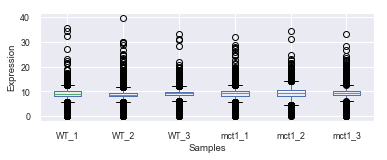

In [13]:
#Check normalized distributions
xp.check_samples(prot)

In [14]:
#Heatmap prep
prot_scaled, prot_orig = xp.prep_data(prot, meta_prot)

In [15]:
prot_ordered = prot_scaled.reindex(meta_prot[0].tolist()[0:6], axis=1)

In [16]:
#Convert gene to protein names
indices = []
for x in list(prot_ordered.index):
    x = x[0] + x[1:3].lower() + x[3:]
    indices.append(x)
    
prot_ordered.index = indices

genes1_index = []
for x in genes1:
    x = x[0] + x[1:3].lower() + x[3:]
    genes1_index.append(x)

genes2_index = []
for x in genes2:
    x = x[0] + x[1:3].lower() + x[3:]
    genes2_index.append(x)

In [17]:
colors_prot = {
    'WT': '#027871',
    'mct1': '#A90D0D'
}

<Figure size 432x288 with 0 Axes>

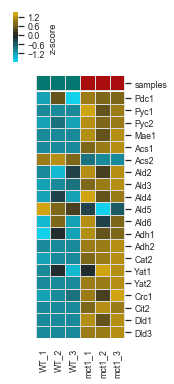

In [18]:
xp.heatmap(prot_ordered, meta_prot, sample_palette=colors_prot, 
           gene_list=genes1_index, col_cluster=False, 
           figsize=(2,6), cbar_kws= {'label': 'z-score'},
          save_fig='./figures_draft1/proteomics_heatmap1.pdf', dpi=1200)

<Figure size 432x288 with 0 Axes>

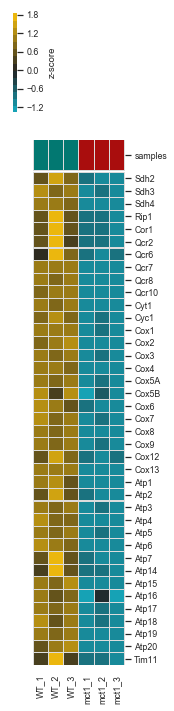

In [19]:
xp.heatmap(prot_ordered, meta_prot, sample_palette=colors_prot, 
           gene_list=genes2_index, col_cluster=False, 
           figsize=(2,12), cbar_kws= {'label': 'z-score'},
          save_fig='./figures_draft1/proteomics_heatmap2.pdf', dpi=1200)

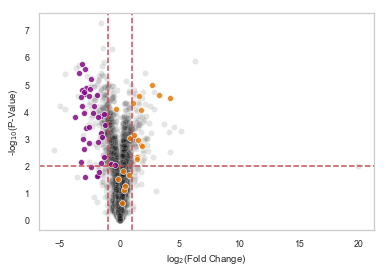

In [20]:
mt.volcano(prot_orig, meta_prot, 'mct1', 'WT', highlight_genes=[genes1, genes2], 
           y_threshold=2, x_threshold=1, 
           alpha=.1, 
           alpha_highlights=.8,
           highlight_color=['#ea7901','purple'],
          save_fig='figures_draft1/proteomics_volcano.pdf', dpi=1200,
          whitegrid=True)

<b><u>tRNA MODIFICATION DATA</u></b>

In [24]:
trna = pd.read_csv('trna_yo.txt', sep='\t', index_col=0)
trna_meta = pd.read_csv('trna_meta.txt', sep='\t', header=None)

In [26]:
trna.head()

,mcm5U,mcm5S2U
190219_MM_wt_1,0.002384,0.002318
190219_MM_wt_2,0.003863,0.004242
190219_MM_wt_3,0.002747,0.002506
190219_MM_htd2_1,0.002180,0.002224
190219_MM_htd2_2,0.002823,0.003121


In [28]:
set(trna_meta[1])

{'WT', 'elp3', 'htd2', 'mtc1', 'ncs6', 'oar1'}

In [29]:
colors = {
    'WT':'green', 'elp3':'blue', 'htd2':'red', 'mtc1':'yellow', 'ncs6':'purple', 'oar1':'orange'
}

In [31]:
trna_t = 10**trna.T

<Figure size 432x288 with 0 Axes>

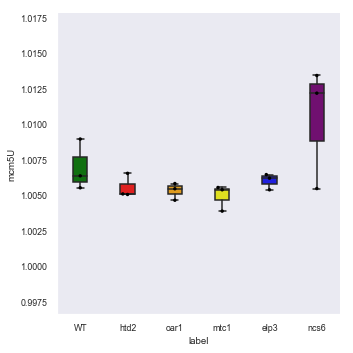

In [38]:
xp.gene_overview(trna_t, trna_meta, 'mcm5U', palette=colors)

<Figure size 432x288 with 0 Axes>

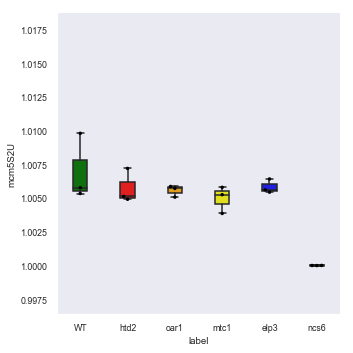

In [36]:
xp.gene_overview(trna_t, trna_meta, 'mcm5S2U', palette=colors)